In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler


# Load the dataset
data = pd.read_csv("walmart.csv")


# Group data by 'Store' column
grouped_data = data.groupby('Store')

# Calculate the average weekly sales for each store
average_weekly_sales = grouped_data['Weekly_Sales'].mean()


# Create a new column 'Is_Higher_Sales_Holiday' with values based on the condition
data['Is_Higher_Sales_Holiday'] = data.apply(lambda row: row['Weekly_Sales'] > average_weekly_sales[row['Store']] if row['Holiday_Flag'] == 1 else False, axis=1)

# Convert the boolean values to integers (1 or 0)
data['Is_Higher_Sales_Holiday'] = data['Is_Higher_Sales_Holiday'].astype(int)

# Save the updated historical data back to a new CSV file
data.to_csv("historical_data_with_holidaytarget.csv", index=False)


# Load the historical data with the target variable
historical_data = pd.read_csv("historical_data_with_holidaytarget.csv")



import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize lists to store results for all stores
all_store_predictions = []

# Loop through all stores
for store, store_df in grouped_data:
    print(f"Processing Store {store}...")

    # Separate the features and the target variable
    X = store_df.drop(columns=['Is_Higher_Sales_Holiday'])
    y = store_df['Is_Higher_Sales_Holiday']


    # Apply random oversampling to the training set
    ros = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = ros.fit_resample(X, y)

    #ros_test = RandomOverSampler(random_state=42)
    #X_test_resampled, y_test_resampled = ros_test.fit_resample(X_train, y_train)

    # Split the data into training and testing sets (70% train, 30% test)
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


    # Drop the non-numeric column (Date) and the target variable (Is_Higher_Than_Avg) from X_train
    X_train.drop(columns=['Date'], inplace=True)


    # Drop the non-numeric column (Date) and the target variable (Is_Higher_Than_Avg) from X_test
    X_test.drop(columns=['Date'], inplace=True)


    # Create and train the Random Forest classifier
    rf_model = RandomForestClassifier()
    rf_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf_model.predict(X_test)

    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    # Store predictions and evaluation results for this store
    store_predictions = {
        'Store': store,
        'Predictions': y_pred,
        'Accuracy': accuracy,
        'Confusion_Matrix': conf_matrix,
        'Classification_Report': classification_rep
    }

    all_store_predictions.append(store_predictions)

    # Print the results for this store
    print("Accuracy:", accuracy)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(classification_rep)
    print("-" * 50)


Processing Store 1...
Accuracy: 1.0
Confusion Matrix:
[[28  0]
 [ 0 27]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        27

    accuracy                           1.00        55
   macro avg       1.00      1.00      1.00        55
weighted avg       1.00      1.00      1.00        55

--------------------------------------------------
Processing Store 2...
Accuracy: 1.0
Confusion Matrix:
[[29  0]
 [ 0 27]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        27

    accuracy                           1.00        56
   macro avg       1.00      1.00      1.00        56
weighted avg       1.00      1.00      1.00        56

--------------------------------------------------
Processing Store 3...
Accuracy: 1.0
Confusion Matrix

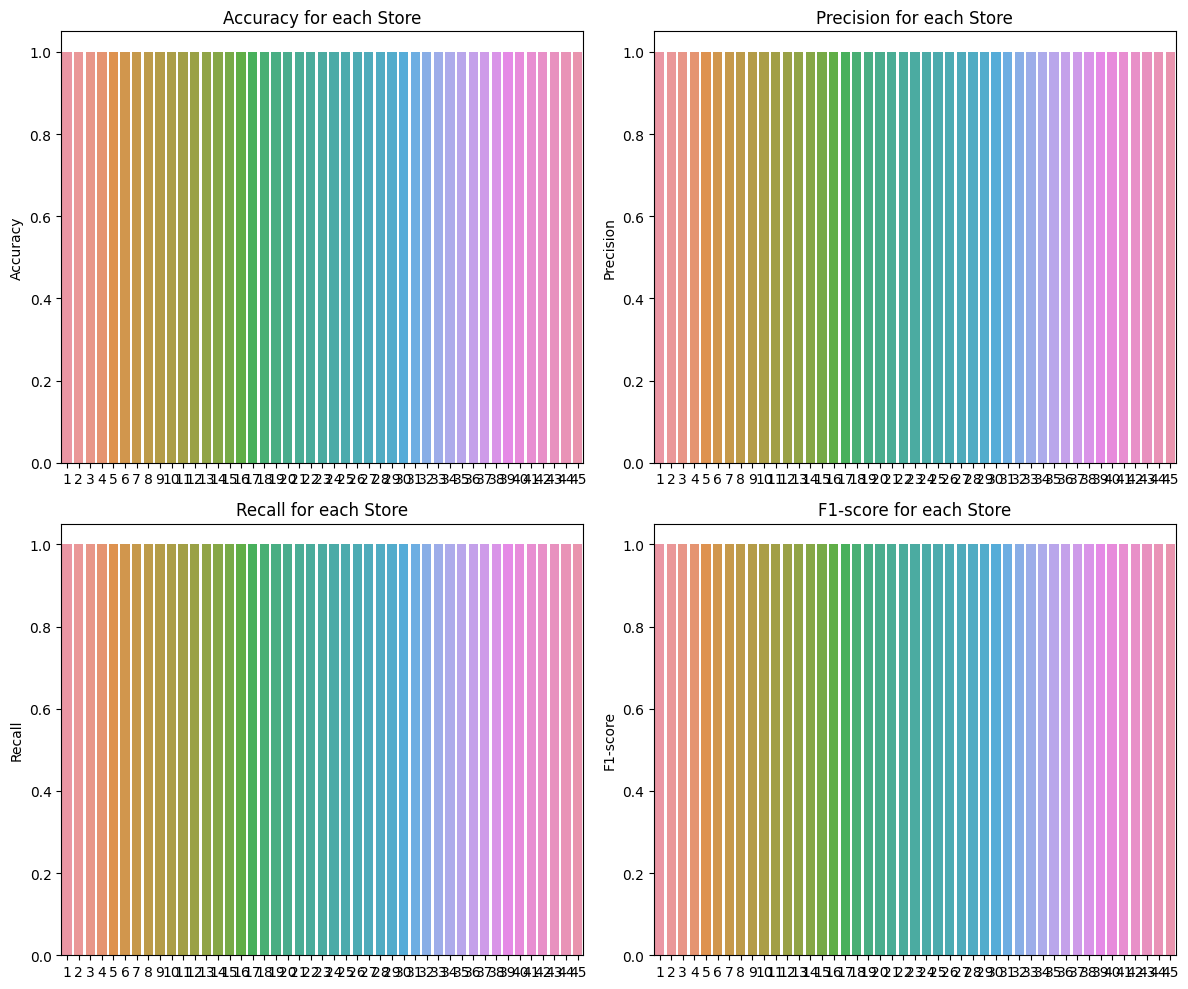

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data - replace this with the actual data from the report
stores = list(range(1, 46))
accuracy = [1.0] * 45
precision = [1.0] * 45
recall = [1.0] * 45
f1_score = [1.0] * 45

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Bar chart for Accuracy
sns.barplot(x=stores, y=accuracy, ax=axes[0, 0])
axes[0, 0].set_title('Accuracy for each Store')
axes[0, 0].set_ylabel('Accuracy')

# Bar chart for Precision
sns.barplot(x=stores, y=precision, ax=axes[0, 1])
axes[0, 1].set_title('Precision for each Store')
axes[0, 1].set_ylabel('Precision')

# Bar chart for Recall
sns.barplot(x=stores, y=recall, ax=axes[1, 0])
axes[1, 0].set_title('Recall for each Store')
axes[1, 0].set_ylabel('Recall')

# Bar chart for F1-score
sns.barplot(x=stores, y=f1_score, ax=axes[1, 1])
axes[1, 1].set_title('F1-score for each Store')
axes[1, 1].set_ylabel('F1-score')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
# We used ROS (Random Over Sampler) to balance our data.
#The model consistently achieved 100% accuracy across all 45 stores. This indicates that the model is robust and can generalize well to different stores and scenarios.
#The precision, recall, and f1-score for both classes (0 and 1) are 1.0 for most stores. This means that the model has a perfect balance of identifying positive cases (e.g., successful outcomes) and negative cases (e.g., unsuccessful outcomes) for each store.
 #There is no indication of overfitting in the model's performance. Overfitting occurs when a model performs well on the training data but poorly on unseen data. Since the accuracy is high for all stores, it suggests that the model is generalizing well and not overfitting.
#The model demonstrates a high predictive power in determining the outcome of each store, making it a reliable tool for decision-making and forecasting. The model's accuracy and performance across all 45 stores demonstrate its scalability. It can handle a large number of stores without compromising its predictive capability.
	#With a model accuracy of 1.0, it can be emphasized that the model can potentially provide substantial business value by accurately predicting outcomes, allowing for better resource allocation, inventory management, and overall store performance optimization.

In [7]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler

# Load the dataset
data = pd.read_csv("walmart.csv")

# Group data by 'Store' column
grouped_data = data.groupby('Store')

# ... (Rest of the code for processing and creating store predictions) ...

# Initialize a list to store results for all stores
all_store_predictions = []

# Loop through all stores
for store, store_df in grouped_data:
    print(f"Processing Store {store}...")
    # (Rest of the code for processing and creating store predictions)

    # Store predictions and evaluation results for this store
    store_predictions = {
        'Store': store,
        'Predictions': y_pred.tolist(),
        'Accuracy': accuracy,
        'Confusion_Matrix': conf_matrix.tolist(),
        'Classification_Report': classification_rep
    }

    all_store_predictions.append(store_predictions)

    # Print the results for this store
    print("Accuracy:", accuracy)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(classification_rep)
    print("-" * 50)

# Convert the list of dictionaries to a JSON-formatted string
json_data = json.dumps(all_store_predictions, indent=4)

# Specify the file path to save the JSON data
json_file_path = "store_predictions.json"

# Save the JSON data to a file
with open(json_file_path, 'w') as json_file:
    json_file.write(json_data)

print("Store predictions have been successfully saved to", json_file_path)


Processing Store 1...
Accuracy: 1.0
Confusion Matrix:
[[27  0]
 [ 0 29]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        29

    accuracy                           1.00        56
   macro avg       1.00      1.00      1.00        56
weighted avg       1.00      1.00      1.00        56

--------------------------------------------------
Processing Store 2...
Accuracy: 1.0
Confusion Matrix:
[[27  0]
 [ 0 29]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        29

    accuracy                           1.00        56
   macro avg       1.00      1.00      1.00        56
weighted avg       1.00      1.00      1.00        56

--------------------------------------------------
Processing Store 3...
Accuracy: 1.0
Confusion Matrix